In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re

In [33]:
#Airline and Airport Customer Reviews Dataset
df = pd.read_csv("C:\\Users\\Galaxy Computers\\Desktop\\BA_reviews.csv")
df.head()

,Unnamed: 0,Review,Stars
0,0,✅ Trip Verified | Easy check in a T5. Galleri...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,1,"Not Verified | Flight delayed by an hour, it ...",8
2,2,Not Verified | The staff are very rude and not...,2
3,3,✅ Trip Verified | Good domestic flight operat...,2
4,4,Not Verified | Failed at all basic travel fund...,10


In [34]:
len(df.columns)

3

In [35]:
df.tail()

,Unnamed: 0,Review,Stars
3445,3445,BA2262 on 17th Feb 2014. I was in 4A from Jama...,4
3446,3446,Domestic Edinburgh-Gatwick. Late by 40 mins bu...,1
3447,3447,LHR-BSL-LHR A319's each way check/bag drop atT...,10
3448,3448,Flew on a 777-200 from London Heathrow to San ...,7
3449,3449,DME-LHR. B747-400. Used Avios to sample the 'n...,2


## Data Cleaning

In [36]:
df.drop(columns='Unnamed: 0', inplace=True)

##### Fill None values with the mean of the column

In [37]:
df['Stars'].value_counts()

1                                804
2                                400
3                                380
8                                334
10                               285
9                                283
7                                280
4                                234
5                                211
6                                167
\n\t\t\t\t\t\t\t\t\t\t\t\t\t5     68
None                               4
Name: Stars, dtype: int64

In [38]:
len(df['Stars'])

3450

In [39]:
# Let's clean the 'stars' column by removing '\t' and '\n'
df['Stars'] = df['Stars'].str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

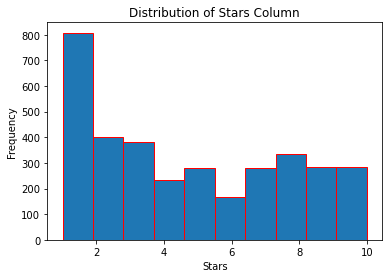

In [44]:
plt.hist(df['Stars'], bins=10, edgecolor='red') 
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Stars Column')
plt.show()

In [41]:
df.isnull().sum()

Review    0
Stars     0
dtype: int64

In [43]:
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

df['Stars'] = df['Stars'].replace("None", pd.NA)
most_frequent_star = df['Stars'].mode()[0]
df['Stars'].fillna(most_frequent_star, inplace=True)

#### Cleaning Rewiews

In [45]:
print(df.Review.head(6),df.Review.head(6))

0    ✅ Trip Verified |  Easy check in a T5. Galleri...
1    Not Verified |  Flight delayed by an hour, it ...
2    Not Verified | The staff are very rude and not...
3    ✅ Trip Verified |  Good domestic flight operat...
4    Not Verified | Failed at all basic travel fund...
5    ✅ Trip Verified |  They lost my baggage in a v...
Name: Review, dtype: object 0    ✅ Trip Verified |  Easy check in a T5. Galleri...
1    Not Verified |  Flight delayed by an hour, it ...
2    Not Verified | The staff are very rude and not...
3    ✅ Trip Verified |  Good domestic flight operat...
4    Not Verified | Failed at all basic travel fund...
5    ✅ Trip Verified |  They lost my baggage in a v...
Name: Review, dtype: object


In [46]:
df

,Review,Stars
0,✅ Trip Verified | Easy check in a T5. Galleri...,5.0
1,"Not Verified | Flight delayed by an hour, it ...",8.0
2,Not Verified | The staff are very rude and not...,2.0
3,✅ Trip Verified | Good domestic flight operat...,2.0
4,Not Verified | Failed at all basic travel fund...,10.0
...,...,...
3445,BA2262 on 17th Feb 2014. I was in 4A from Jama...,4.0
3446,Domestic Edinburgh-Gatwick. Late by 40 mins bu...,1.0
3447,LHR-BSL-LHR A319's each way check/bag drop atT...,10.0
3448,Flew on a 777-200 from London Heathrow to San ...,7.0


In [47]:
cleaned_reviews = []
lemma = WordNetLemmatizer()

for review in df.Review:
    review = re.sub("[^a-zA-Z]", " ", review)
    review = review.lower()
    words = word_tokenize(review)
    words = [word for word in words if word not in set(stopwords.words("english"))]
    lemmatized_words = [lemma.lemmatize(word) for word in words]
    cleaned_review = " ".join(lemmatized_words)
    cleaned_reviews.append(cleaned_review)

In [48]:
df['reviews'] = cleaned_reviews

In [49]:
df

,Review,Stars,reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...,5.0,trip verified easy check gallery south north l...
1,"Not Verified | Flight delayed by an hour, it ...",8.0,verified flight delayed hour happens biggie u ...
2,Not Verified | The staff are very rude and not...,2.0,verified staff rude trained properly exception...
3,✅ Trip Verified | Good domestic flight operat...,2.0,trip verified good domestic flight operated ba...
4,Not Verified | Failed at all basic travel fund...,10.0,verified failed basic travel fundamental fligh...
...,...,...,...
3445,BA2262 on 17th Feb 2014. I was in 4A from Jama...,4.0,ba th feb jamaica london gatwick need climb an...
3446,Domestic Edinburgh-Gatwick. Late by 40 mins bu...,1.0,domestic edinburgh gatwick late min unusual fl...
3447,LHR-BSL-LHR A319's each way check/bag drop atT...,10.0,lhr bsl lhr way check bag drop att took age ar...
3448,Flew on a 777-200 from London Heathrow to San ...,7.0,flew london heathrow san diego worst flight ta...


In [50]:
#Let's drop previous review column

df.drop('Review',axis=1,inplace= True)

In [51]:

#Let's do first column
new_order = ['reviews'] + [col for col in df.columns if col != 'reviews']
df = df[new_order]

In [52]:
df.head()

,reviews,Stars
0,trip verified easy check gallery south north l...,5.0
1,verified flight delayed hour happens biggie u ...,8.0
2,verified staff rude trained properly exception...,2.0
3,trip verified good domestic flight operated ba...,2.0
4,verified failed basic travel fundamental fligh...,10.0


In [53]:
df['reviews'] = df['reviews'].str.replace('trip verified', '').str.replace('verified', '')

In [54]:
df.head()

,reviews,Stars
0,easy check gallery south north lounge packed ...,5.0
1,flight delayed hour happens biggie u change g...,8.0
2,staff rude trained properly exception made ch...,2.0
3,good domestic flight operated ba cityflyer gr...,2.0
4,failed basic travel fundamental flight delaye...,10.0


### Exploratory Data Analysis

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reviews  3450 non-null   object 
 1   Stars    3450 non-null   float64
dtypes: float64(1), object(1)
memory usage: 54.0+ KB


In [56]:
df.describe()

,Stars
count,3450.000000
mean,4.669565
std,3.132861
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


###### Average point of star rating column

In [57]:
print(round(df['Stars'].mean(), 2))

4.67


###### What star did customers give the most?

<AxesSubplot:>

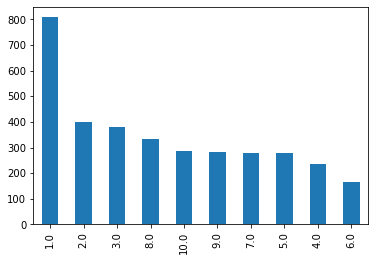

In [58]:
df.Stars.value_counts().plot(kind = 'bar')

In [77]:
df.reviews.head()

0     easy check gallery south north lounge packed ...
1     flight delayed hour happens biggie u change g...
2     staff rude trained properly exception made ch...
3     good domestic flight operated ba cityflyer gr...
4     failed basic travel fundamental flight delaye...
Name: reviews, dtype: object

In [115]:
from pathlib import Path
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
%matplotlib inline

In [117]:
text = df['reviews'].str.cat(sep=' ')


#set the stopwords list
stopwords= set(STOPWORDS)
new_words = []
new_stopwords=stopwords.union(new_words)